<a href="https://colab.research.google.com/github/Arjun-08/Dimensionality-Reduction-in-Oncology-/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/cancer patient data sets.xlsx')

In [ ]:
keys= df.keys()
keys

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [ ]:
# This removes all the missing data rows

for col in df.columns:
  df = df[df[col] != 0] # we are simply copying all rows which do not contain a null value.

for col in df.columns:
  df= df[df[col] != 'Nan'] # similar as above we are copying all rows which do not contain a MDvalue

In [ ]:
#label encoding
label_encoder = preprocessing.LabelEncoder()

for column_name in df.columns:
  if df[column_name].dtypes == 'object':   #this chooses only those columns that are of type object
     df[column_name] = label_encoder.fit_transform(df[column_name])   #this is the encoding

In [ ]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Data scaling

scaler = StandardScaler() #used to resize the distribution of values also SD=1

In [ ]:
scaler.fit(df) #calculates the various required parameters having one array

StandardScaler()

In [ ]:
scaled_data= scaler.transform(df) #calculated parameters to standardize the data.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) #retaining 2 principal components

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(1000, 25)

In [ ]:
x_pca.shape

(1000, 2)

Text(0, 0.5, 'Second Principal component')

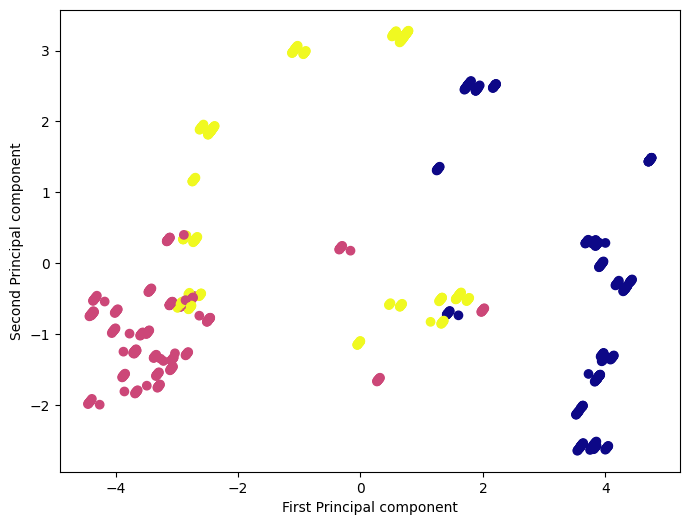

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c = df["Level"],cmap="plasma")
plt.xlabel("First Principal component")
plt.ylabel("Second Principal component")

In [ ]:
pca.components_

array([[ 1.62792780e-02,  2.71693448e-02, -8.16750970e-02,
         2.51086819e-01,  2.88792364e-01,  2.70717702e-01,
         2.85282020e-01,  2.92802455e-01,  2.65491230e-01,
         2.73262394e-01,  2.77968010e-01,  2.15697105e-01,
         2.53069263e-01,  2.76657275e-01,  2.66392605e-01,
         1.53877787e-01,  8.27720325e-02,  1.48379481e-01,
         5.65704157e-02,  2.31382255e-02,  8.96115384e-02,
         8.67591981e-02,  1.02403652e-01,  3.89009477e-02,
        -2.02821751e-01],
       [ 1.70574399e-02,  3.19578848e-02,  1.72572400e-02,
         2.38916608e-05,  5.24675311e-02,  1.45934544e-01,
         2.32730932e-02,  4.24961195e-02, -7.66698041e-02,
        -1.09655494e-01,  1.03817725e-02, -3.18562536e-01,
        -2.12132116e-01, -1.52931053e-01, -1.20310223e-01,
         1.44455288e-01,  4.19108529e-01,  4.22854827e-01,
         2.38612263e-01, -1.01965192e-01,  3.96416232e-01,
         2.28660426e-01,  2.69159568e-01, -7.98383412e-02,
         1.96791835e-01]])

In [ ]:
pca.components_.shape

(2, 25)

In [ ]:
df_comp1 = np.column_stack(( keys, pca.components_[0]))
#df_comp = pd.Dataframe(pca.components_, df.columns)

In [ ]:
df_comp1

array([['Patient Id', 0.0162792780383069],
       ['Age', 0.027169344767820874],
       ['Gender', -0.08167509701935308],
       ['Air Pollution', 0.25108681914855474],
       ['Alcohol use', 0.28879236375996814],
       ['Dust Allergy', 0.27071770182829924],
       ['OccuPational Hazards', 0.28528201967635897],
       ['Genetic Risk', 0.29280245536992844],
       ['chronic Lung Disease', 0.26549123038714034],
       ['Balanced Diet', 0.2732623936340553],
       ['Obesity', 0.27796800967400886],
       ['Smoking', 0.2156971050976771],
       ['Passive Smoker', 0.2530692632818272],
       ['Chest Pain', 0.27665727478483093],
       ['Coughing of Blood', 0.26639260470964465],
       ['Fatigue', 0.15387778733286187],
       ['Weight Loss', 0.08277203246621598],
       ['Shortness of Breath', 0.14837948109475593],
       ['Wheezing', 0.05657041568041242],
       ['Swallowing Difficulty', 0.023138225504893133],
       ['Clubbing of Finger Nails', 0.08961153841404076],
       ['Frequent Cold

In [ ]:
df_comp2 = np.column_stack((keys, pca.components_[1]))

In [ ]:
df_comp2

array([['Patient Id', 0.017057439852338076],
       ['Age', 0.03195788480183761],
       ['Gender', 0.017257240043702014],
       ['Air Pollution', 2.3891660768327548e-05],
       ['Alcohol use', 0.05246753107241241],
       ['Dust Allergy', 0.14593454439860035],
       ['OccuPational Hazards', 0.023273093166087572],
       ['Genetic Risk', 0.04249611954114618],
       ['chronic Lung Disease', -0.07666980414224624],
       ['Balanced Diet', -0.1096554944509648],
       ['Obesity', 0.010381772515945112],
       ['Smoking', -0.3185625363420708],
       ['Passive Smoker', -0.21213211622748962],
       ['Chest Pain', -0.15293105322885478],
       ['Coughing of Blood', -0.1203102231680697],
       ['Fatigue', 0.14445528842730743],
       ['Weight Loss', 0.41910852919210295],
       ['Shortness of Breath', 0.4228548269031863],
       ['Wheezing', 0.23861226271765104],
       ['Swallowing Difficulty', -0.10196519214052446],
       ['Clubbing of Finger Nails', 0.396416232023605],
       ['Freq

In [ ]:
dff1 = pd.DataFrame(df_comp1)

In [ ]:
dff1

,0,1
0,Patient Id,0.016279
1,Age,0.027169
2,Gender,-0.081675
3,Air Pollution,0.251087
4,Alcohol use,0.288792
5,Dust Allergy,0.270718
6,OccuPational Hazards,0.285282
7,Genetic Risk,0.292802
8,chronic Lung Disease,0.265491
9,Balanced Diet,0.273262


In [ ]:
dff2 = pd.DataFrame(df_comp2)

In [ ]:
dff2

,0,1
0,Patient Id,0.017057
1,Age,0.031958
2,Gender,0.017257
3,Air Pollution,0.000024
4,Alcohol use,0.052468
5,Dust Allergy,0.145935
6,OccuPational Hazards,0.023273
7,Genetic Risk,0.042496
8,chronic Lung Disease,-0.07667
9,Balanced Diet,-0.109655


<Axes: >

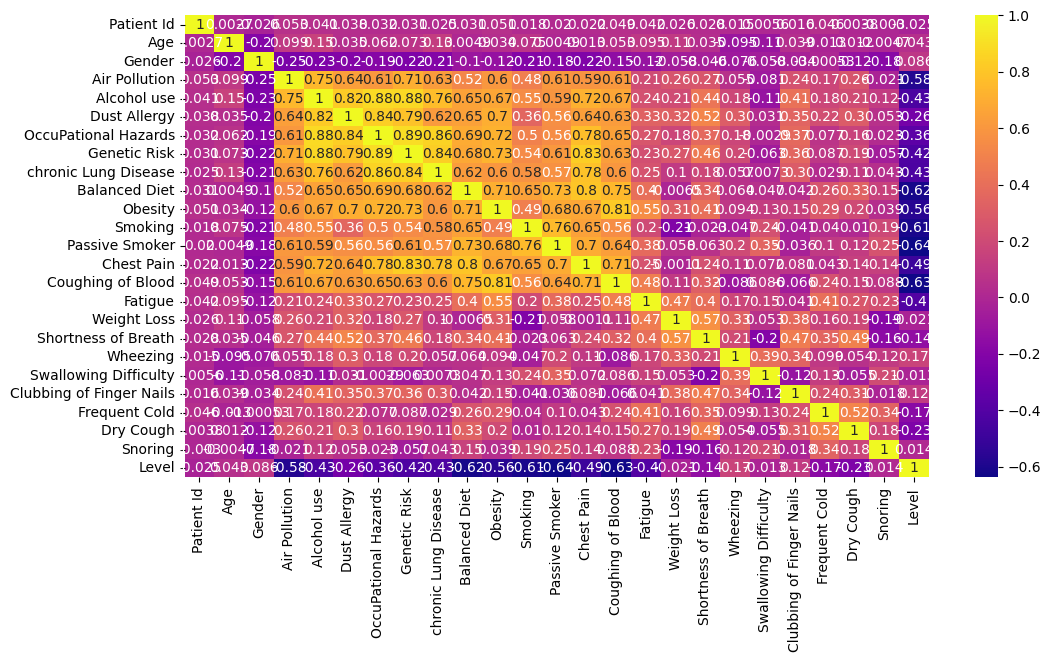

In [ ]:
plt.figure(figsize=(12,6))
#sns.heatmap(df_comp, cmap ="plasma")

corr_matrix = df.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap="plasma", annot=True)